

```
Name: Sudarsun S
RegNo: 20BCE1699
Machine Learning Embedded Lab
Topic: KNN Regression
```



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

**3.import the data into a data frame X**

**4.list few records**

In [3]:
X = pd.read_csv("housing.csv")
display(X.head())

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median,house_value_median
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


**5.Pre-process**

**1.Remove the attribute to be predicted from the data frame and add to another data frame called Y (house_value_median)**

In [4]:
y = X[["house_value_median"]]
X.drop(columns=["house_value_median"], inplace=True)
display(X)
display(y)

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603
20636,-121.21,39.49,18,697,150.0,356,114,2.5568
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672


,house_value_median
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


**2.Show the count, mean, std deviation, min, max etc. metrics about the dataset in frame X**

In [5]:
summary_stats_X = X.describe()
display(summary_stats_X)

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


**3.What do you infer from the values of mean and std deviation**

**Low Standard Deviation (Std Dev):**

Longitude and Latitude have low standard deviations, suggesting little variability in geographic coordinates.
Income Median has a low standard deviation, indicating relatively consistent income values among households.

**High Standard Deviation (Std Dev):**

House Age, Rooms Total, Bedrooms Total, Population, and Households have high standard deviations, indicating significant variability in these features. For example, there is a wide range in house ages and property sizes.

**4.If the mean or the std deviation is more, is it good to use it directly without scaling the values? Justify**

If the mean or standard deviation of a feature is significantly larger than those of other features in your dataset, it may be a good idea to scale the values. This is because large differences in means or standard deviations among features can lead to imbalances in some machine learning algorithms. Scaling the values to have similar means and standard deviations across features can help prevent certain features from dominating the learning process and improve model performance. Scaling ensures that all features are on a similar scale, making them more directly comparable and reducing the risk of bias toward features with larger values.

**5.Split the data into train and test set using train_test_split of sklearn, set seed to some value, let the test size be .25**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**6.Print the length of the train frame, test frame**

In [7]:
print("Length of train frame (X_train):", len(X_train))
print("Length of train frame (Y_train):", len(Y_train))

print("Length of test frame (X_test):", len(X_test))
print("Length of test frame (Y_test):", len(Y_test))

Length of train frame (X_train): 15480
Length of train frame (Y_train): 15480
Length of test frame (X_test): 5160
Length of test frame (Y_test): 5160


**7.Using StandardScalar of sklearn transform(scale) the values of X train and X test data frames**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**8.Show the count, mean, std deviation, min, max etc metrics about the scaled dataset in frame X train**

In [9]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
summary_stats_X_train = X_train_scaled_df.describe()
display(summary_stats_X_train)

,longitude,latitude,House_Age,Rooms_total,bedrooms_total,population,households,income_median
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04
mean,2.206676e-15,7.890329e-16,-1.232434e-16,-7.803118e-18,9.730947e-17,-8.996536e-17,4.268764e-17,2.074711e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-2.380303e+00,-1.451215e+00,-2.188261e+00,-1.210637e+00,-1.278414e+00,-1.246395e+00,-1.304742e+00,-1.774632e+00
25%,-1.106817e+00,-7.998196e-01,-8.402236e-01,-5.463367e-01,-5.777726e-01,-5.588859e-01,-5.762069e-01,-6.888537e-01
50%,5.362306e-01,-6.451718e-01,3.203613e-02,-2.352607e-01,-2.428898e-01,-2.279278e-01,-2.354405e-01,-1.756629e-01
75%,7.859338e-01,9.716009e-01,6.664069e-01,2.389125e-01,2.582469e-01,2.620564e-01,2.776676e-01,4.644500e-01
max,2.633738e+00,2.953905e+00,1.855852e+00,1.680245e+01,1.402644e+01,2.997172e+01,1.457419e+01,5.842113e+00


**9.Check the std deviation now and describe what has happened?**

The standard deviations for all features in the scaled X_train dataset are approximately 1.000032e+00 (1.000032 multiplied by 10^0), which is very close to 1. When we use the StandardScaler from scikit-learn to scale the features, it transforms the data in such a way that each feature has a mean of approximately 0 and a standard deviation of approximately 1. This makes the spread or variability of each feature is consistent, making them directly comparable. This transformation is known as standardization or z-score scaling.

**10.Using KNeighborsRegressor with K=5 train the model**

In [10]:
nan_indices_train = np.isnan(X_train_scaled).any(axis=1)
nan_indices_test = np.isnan(X_test_scaled).any(axis=1)
X_train_cleaned = X_train_scaled[~nan_indices_train]
Y_train_cleaned = Y_train[~nan_indices_train]
X_test_cleaned = X_test_scaled[~nan_indices_test]
Y_test_cleaned = Y_test[~nan_indices_test]

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_cleaned, Y_train_cleaned)




KNeighborsRegressor()

**11.Predict our test data**

In [12]:
Y_pred = knn_model.predict(X_test_cleaned)
Y_pred

array([[127100. ],
       [192940. ],
       [172680. ],
       ...,
       [132980. ],
       [329560. ],
       [430540.2]])

**12.Use MAE, MSE, R2 score the evaluate the model**

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test_cleaned, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(Y_test_cleaned, Y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(Y_test_cleaned, Y_pred)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 41718.08721986675
Mean Squared Error (MSE): 3843199247.74674
R-squared (R2) Score: 0.7103153025874712


**13.Show all the statistics of the predicted variable such as count, mean, std. deviation etc.**

In [14]:
Y_pred_1d = Y_pred.reshape(-1)
predicted_df = pd.DataFrame({'Predicted_Y': Y_pred_1d})
predicted_stats = predicted_df.describe()
print(predicted_stats)

         Predicted_Y
count    4953.000000
mean   204733.001050
std     98297.718146
min     46380.000000
25%    132320.000000
50%    188020.000000
75%    257860.000000
max    500001.000000


**14.What do you infer from the mean and std deviation?**

**Mean (Average) Predicted Value:** The mean predicted value is approximately 204,733. This represents the average prediction made by the KNeighborsRegressor model on the test data. It suggests that, on average, the model predicts a housing value of around $204,733.

**Standard Deviation (Spread or Variability):** The standard deviation of approximately 98,297.72 indicates the spread or variability of the model's predictions around the mean. In this context, it means that the predicted housing values can vary by roughly $98,297 from the mean prediction. A higher standard deviation suggests that the model's predictions are more spread out, indicating potential variability in the accuracy of predictions across different data points.

**15.Is the MAE value good?**

 A MAE value of approximately $41,718.08 is good in our case.

**16.Find the best value of K (1 to 35) for the given data set**

In [15]:
from sklearn.model_selection import cross_val_score

k_values = np.arange(1, 36)

mean_mae_scores = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    mae_scores = -cross_val_score(knn_model, X_train_cleaned, Y_train_cleaned, scoring='neg_mean_absolute_error', cv=5)
    mean_mae = np.mean(mae_scores)
    mean_mae_scores.append(mean_mae)

best_k = k_values[np.argmin(mean_mae_scores)]
best_mae = min(mean_mae_scores)

print("Best K:", best_k)
print("Best Mean MAE:", best_mae)


Best K: 8
Best Mean MAE: 42712.64895833333


**17.Plot the error values with K obtained in Q16**

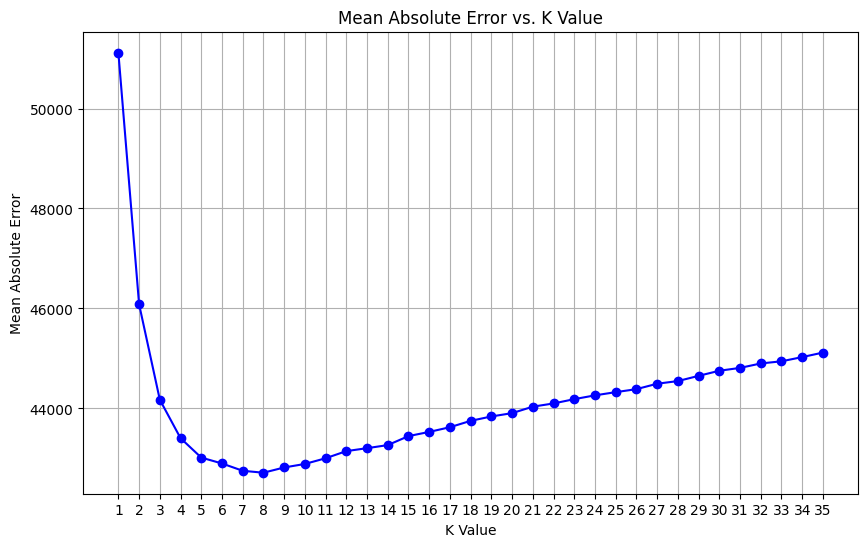

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_mae_scores, marker='o', linestyle='-', color='b')
plt.title('Mean Absolute Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.xticks(k_values)
plt.show()


**18.Derive the lowest MAE for which K value is chosen**

In [17]:
min_mae_index = np.argmin(mean_mae_scores)

best_k = k_values[min_mae_index]
best_mae = mean_mae_scores[min_mae_index]

print("Lowest Mean Absolute Error (MAE):", best_mae)
print("Corresponding K Value:", best_k)


Lowest Mean Absolute Error (MAE): 42712.64895833333
Corresponding K Value: 8


**19.Print the score of the classifier, what do you interpret?**

In [18]:
knn_model = KNeighborsRegressor(n_neighbors=best_k)

knn_model.fit(X_train_cleaned, Y_train_cleaned)

r2_score = knn_model.score(X_test_cleaned, Y_test_cleaned)
print("R-squared (R2) Score:", r2_score)


R-squared (R2) Score: 0.7164540111780238


The R-squared (R2) score of approximately 0.716 indicates that your KNeighborsRegressor model explains about 71.6% of the variability in housing values, which is a reasonably good fit for the data.